In [ ]:
#Develop a system that predicts the loan default and prioritizes loan recovery actions to minimize losses.
#The system uses historical loan and customer data to identify risky loans, enabling lenders to take early intervention steps.
#Default Loan (1) → Customer failed to repay loan.
#Non-Default Loan (0) → Customer repaid loan successfully

In [1]:
#Logistic Regression is a supervised classification algorithm used when the target variable is categorical (usually binary: 0 or 1).

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
#1. data loading
df=pd.read_csv("LoanDataSet.csv")

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
#2. EDA-->read & explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Check missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool


<Axes: xlabel='Gender', ylabel='count'>

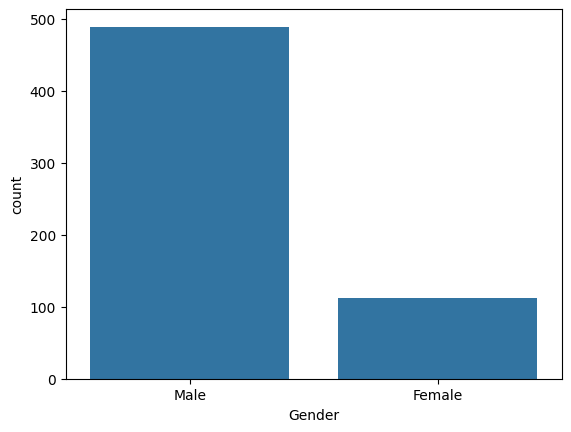

In [10]:
#3. missing value imputation
sns.countplot(x=df["Gender"])

In [ ]:
df["Gender"].mode()[0]      #finds most frequently occurring value

In [11]:
#Replace all missing values in the Gender column with the most common gender in the dataset.
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

<Axes: xlabel='Married', ylabel='count'>

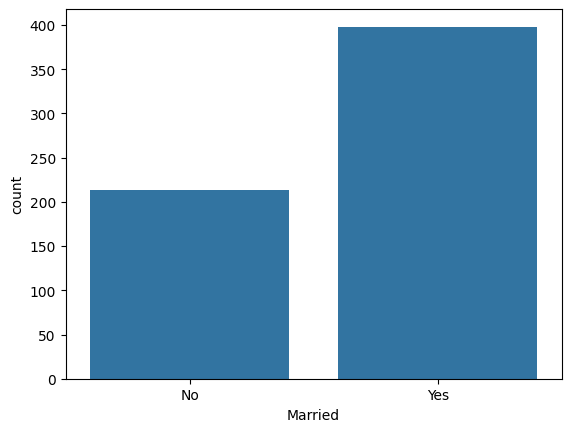

In [12]:
sns.countplot(x=df["Married"])

In [13]:
df["Married"].mode()[0]

'Yes'

In [14]:
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])

<Axes: xlabel='Dependents', ylabel='count'>

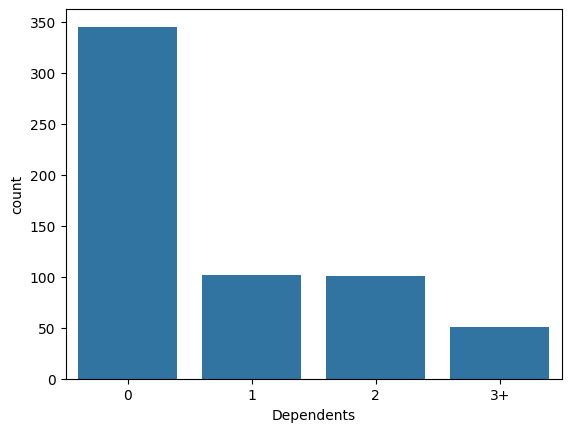

In [15]:
sns.countplot(x=df["Dependents"])

In [16]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [17]:
df["Dependents"].mode()[0]

'0'

In [18]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])

<Axes: xlabel='Self_Employed', ylabel='count'>

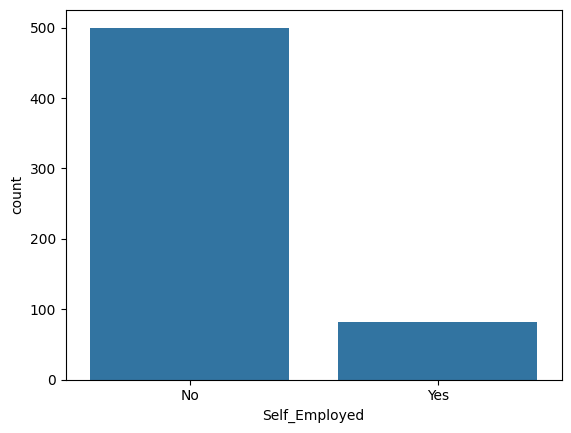

In [19]:
sns.countplot(x=df["Self_Employed"])

In [20]:
df["Self_Employed"].mode()[0]

'No'

In [21]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"]).mode()[0]

In [22]:
df["LoanAmount"].median()

128.0

In [23]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())

In [24]:
df["Loan_Amount_Term"].median()

360.0

In [25]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())

<Axes: xlabel='Credit_History', ylabel='count'>

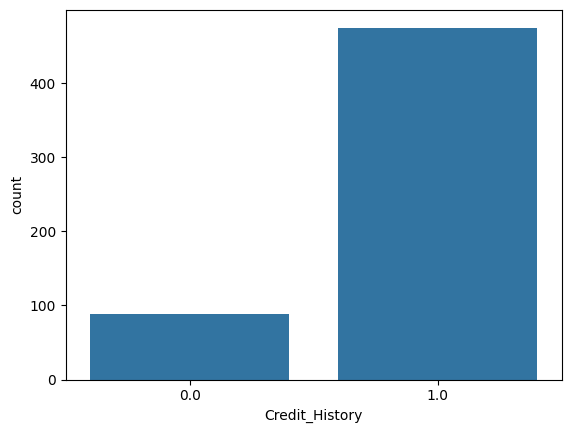

In [26]:
sns.countplot(x=df["Credit_History"])

In [27]:
df["Credit_History"].mode()[0]

np.float64(1.0)

In [28]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [29]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,No,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
#4. Feature Creation
#convert categorical (text) values into numeric values
df.replace({
    "Loan_Status":{"N":0, "Y":1},
    "Gender": {"Male":0, "Female":1},
    "Education": {"Not Graduate":0, "Graduate":1},
    "Married":{"No":0, "Yes":1},
    "Self_Employed":{"No":0, "Yes":1}
}, inplace=True)

In [32]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,1,0,1,0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [40]:
#5. Train Test split the data
def train_test_split_and_features(df):
    y=df["Loan_Status"]              #Loan_Status is target variable
    x=df.drop(["Loan_Status", "Loan_ID"], axis=1)
    x=pd.get_dummies(data=x, columns=["Property_Area", "Dependents"])           #Converts Property_Area and Dependents into dummy columns
    
    #20% data for testing,  80% for training,random_state=0 → ensures same split every time
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=0)
    
    print(x.head(5))
    print(x.columns)         #Print Column Names
    features=list(x.columns)      #Store Feature Names
    return x_train, x_test, y_train, y_test, features
    

In [41]:
#calling the function
x_train, x_test, y_train, y_test, features=train_test_split_and_features(df)

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       0        0          1              0             5849   
1       0        1          1              0             4583   
2       0        1          1              0             3000   
3       0        1          0              0             2583   
4       0        0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                False                    False                 True   
1                 True                    Fa

In [42]:
#Logistic Regression is a supervised machine learning algorithm mainly used for classification problems, 
#where the output is a category (for example: Yes/No, Default/Not Default, Spam/Not Spam).

#Train Model
model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
#Prediction
y_pred = model.predict(x_test)

In [49]:
#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))


Accuracy: 0.8292682926829268
Confusion matrix:
 [[15 18]
 [ 3 87]]


In [ ]:
#TN = 15 → Correctly predicted Non-Default (0)
#FP = 18 → Predicted Default but actually Non-Default
#FN = 3 → Predicted Non-Default but actually Default
#TP = 87 → Correctly predicted Default (1)

In [51]:
import pandas as pd

# Assume y_prob is the predicted probability array
y_prob = model.predict_proba(x_test)[:, 1]

results = pd.DataFrame({
    'Loan_ID': x_test.index,
    'Default_Probability': y_prob
})

def categorize_risk(prob):
    if prob > 0.7:
        return "High"
    elif prob >= 0.3:
        return "Medium"
    else:
        return "Low"

results['Risk_Level'] = results['Default_Probability'].apply(categorize_risk)

def recovery_action(risk):
    if risk == "High":
        return "Immediate intervention"
    elif risk == "Medium":
        return "Monitoring"
    else:
        return "Standard process"

results['Recovery_Action'] = results['Risk_Level'].apply(recovery_action)

print(results.head())

   Loan_ID  Default_Probability Risk_Level         Recovery_Action
0      454             0.841310       High  Immediate intervention
1       52             0.844690       High  Immediate intervention
2      536             0.693055     Medium              Monitoring
3      469             0.778150       High  Immediate intervention
4       55             0.876378       High  Immediate intervention


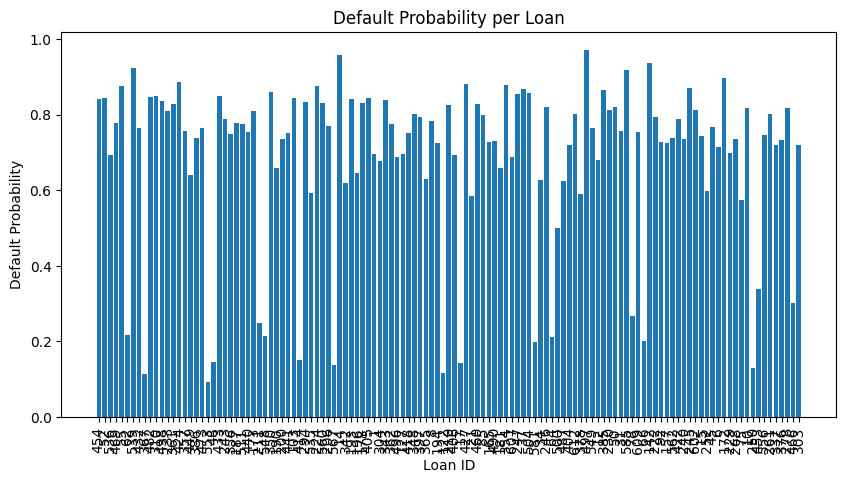

In [52]:
#Bar Chart 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(results["Loan_ID"].astype(str),
        results["Default_Probability"])

plt.xlabel("Loan ID")
plt.ylabel("Default Probability")
plt.title("Default Probability per Loan")
plt.xticks(rotation=90)
plt.show()

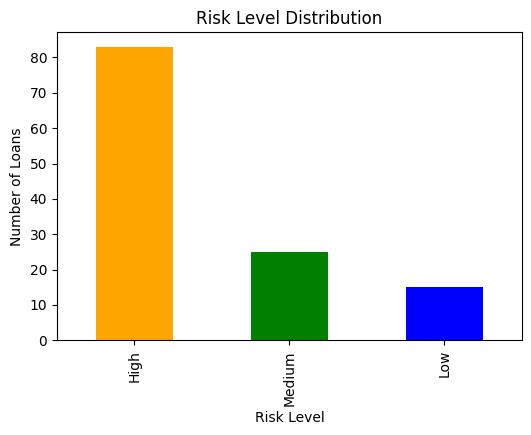

In [57]:
#Risk Level Distribution (Count Plot)
results["Risk_Level"].value_counts().plot(
    kind="bar",
    figsize=(6,4),
    color=["orange", "green", "blue"]
)

plt.title("Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Loans")
plt.show()

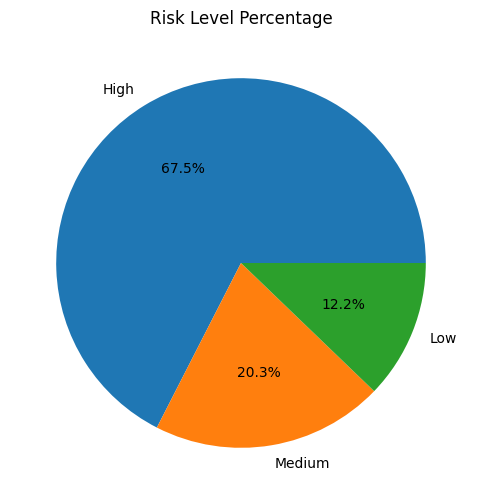

In [54]:
#Pie Chart — Risk Percentage
results["Risk_Level"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6)
)

plt.title("Risk Level Percentage")
plt.ylabel("")
plt.show()

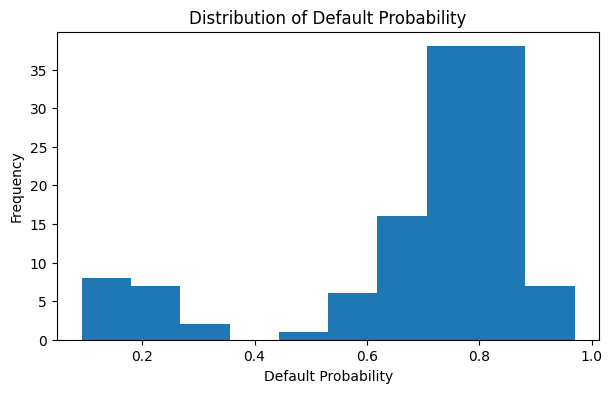

In [55]:
#Default Probability Distribution (Histogram)
plt.figure(figsize=(7,4))
plt.hist(results["Default_Probability"], bins=10)

plt.xlabel("Default Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Default Probability")
plt.show()

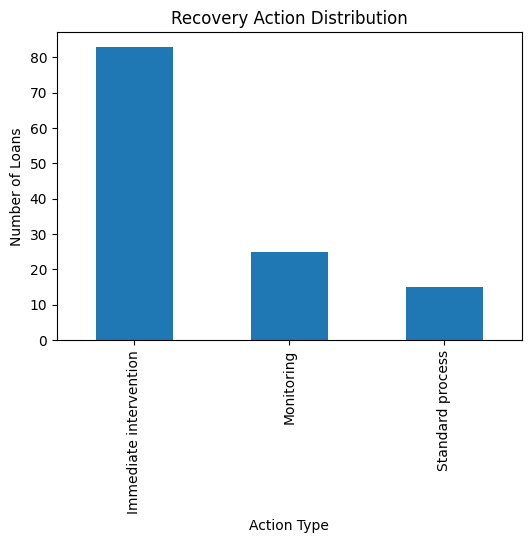

In [56]:
#Recovery Action Distribution
results["Recovery_Action"].value_counts().plot(
    kind="bar",
    figsize=(6,4)
)

plt.title("Recovery Action Distribution")
plt.xlabel("Action Type")
plt.ylabel("Number of Loans")
plt.show()